# Ørsted TurbOPark

This notebook reproduces the results and figures of the two examples provided by Ørsted in   https://github.com/OrstedRD/TurbOPark/blob/main/TurbOParkExamples.mlx

The PyWake look-up table used for the GaussianOverlap model is slightly different from look-up table used by Ørsted (which has a finer grid resolution). The results are therefore slightly different (relative error < 1e-5).

**Install PyWake if needed**

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

**Setting up the wind turbine and site objects**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from py_wake.wind_turbines._wind_turbines import WindTurbine, WindTurbines
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
from py_wake.site._site import UniformSite
from py_wake.site.shear import PowerShear
from py_wake.utils.plotting import setup_plot

**Specifying the wind speed and power and CT curve**

In [3]:
u = np.arange(0, 25.5, .5)
po = [0, 0, 0, 0, 5, 15, 37, 73, 122, 183, 259, 357, 477, 622, 791, 988, 1212, 1469, 1755, 2009, 2176, 2298, 2388, 2447, 2485, 2500, 2500, 2500,
      2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500,
      2500, 2500, 2500, 2500, 2500, 2500, 2500, 0]
ct = [0, 0, 0, 0, 0.78, 0.77, 0.78, 0.78, 0.77, 0.77, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.77, 0.77, 0.77, 0.76, 0.73, 0.7, 0.68, 0.52, 0.42,
      0.36, 0.31, 0.27, 0.24, 0.22, 0.19, 0.18, 0.16, 0.14, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06, 0.06,
      0.05, 0.05, 0.05, 0.04, 0]

wt1 = WindTurbine(name="Ørsted1", diameter=120, hub_height=100, powerCtFunction=PowerCtTabular(u, po, 'kw', ct))

u2 = np.arange(0, 27)
pow2 = [0, 0, 0, 0, 54, 144, 289, 474, 730, 1050, 1417, 1780, 2041, 2199, 2260, 2292, 2299, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 2300, 0]
ct2  = [0, 0, 0, 0, 0.94, 0.82, 0.76, 0.68, 0.86, 0.83, 0.77, 0.68, 0.66, 0.52, 0.47, 0.41, 0.38, 0.34, 0.27, 0.26, 0.23, 0.22, 0.22, 0.2, 0.16, 0.17, 0]
wt2 = WindTurbine(name="Ørsted2", diameter=80, hub_height=70, powerCtFunction=PowerCtTabular(u2, pow2, 'kw', ct2))
wts = WindTurbines.from_WindTurbine_lst([wt1,wt2])

**Plotting the power curve**

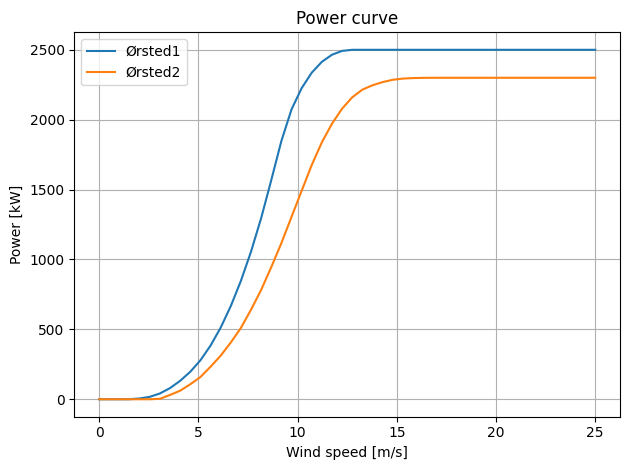

In [4]:
u = np.linspace(0,25)

for t in [0,1]:
    plt.plot(u,wts.power(u, type=t)/1000, label=wts.name(t))
setup_plot(xlabel='Wind speed [m/s]', ylabel='Power [kW]', title='Power curve')

**Plotting the CT curve**

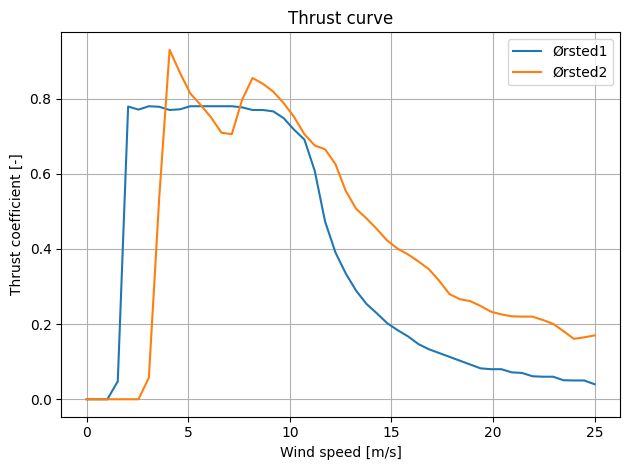

In [5]:
for t in [0,1]:
    plt.plot(u,wts.ct(u, type=t), label=wts.name(t))
setup_plot(xlabel='Wind speed [m/s]', ylabel='Thrust coefficient [-]', title='Thrust curve')

**Wind speed, wind direction and turbulence intensity**

In [6]:
u0 = [6,10,14]           # [m/s]
wd = 270                 # [deg]
ti0 = [0.09,.1,.11]      # [-]

## Example 1 - Square farm with identical turbines

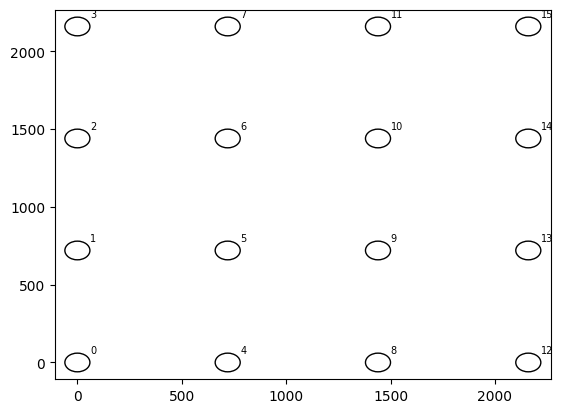

In [7]:
y, x = [v.flatten() for v in np.meshgrid(np.arange(4) * 120 * 6, np.arange(4) * 120 * 6)]
wt1.plot(x, y)

In [8]:
site = UniformSite(shear=PowerShear(h_ref=90, alpha=.1))

In [9]:
from py_wake.literature import Nygaard_2022

wfm = Nygaard_2022(site, wt1)
sim_res = wfm(x, y, ws=u0, wd=wd, TI=ti0)
sim_res.WS_eff

<xarray.DataArray 'WS_eff' (wt: 16, wd: 1, ws: 3)>
array([[[ 6.06355051, 10.10591751, 14.14828452]],

       [[ 6.06355051, 10.10591751, 14.14828452]],

       [[ 6.06355051, 10.10591751, 14.14828452]],

       [[ 6.06355051, 10.10591751, 14.14828452]],

       [[ 4.35804581,  7.37377436, 12.8635598 ]],

       [[ 4.35804581,  7.37377436, 12.8635598 ]],

       [[ 4.35804581,  7.37377436, 12.8635598 ]],

       [[ 4.35804581,  7.37377436, 12.8635598 ]],

       [[ 3.82923427,  6.45011265, 12.02767091]],

       [[ 3.82923427,  6.45011265, 12.02767091]],

       [[ 3.82923427,  6.45011265, 12.02767091]],

       [[ 3.82923427,  6.45011265, 12.02767091]],

       [[ 3.48367104,  5.87190035, 11.17215029]],

       [[ 3.48367104,  5.87190035, 11.17215029]],

       [[ 3.48367104,  5.87190035, 11.17215029]],

       [[ 3.48367104,  5.87190035, 11.17215029]]])
Coordinates:
  * wt       (wt) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * wd       (wd) int32 270
  * ws       (ws) int32 6 10 14
    type     (wt) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    Description:  Effective local wind speed [m/s]

**We now calculate the power of each turbine in the wind farm**

In [10]:
sim_res.Power /1000

<xarray.DataArray 'Power' (wt: 16, wd: 1, ws: 3)>
array([[[ 495.42964709, 2201.84387294, 2500.        ]],

       [[ 495.42964709, 2201.84387294, 2500.        ]],

       [[ 495.42964709, 2201.84387294, 2500.        ]],

       [[ 495.42964709, 2201.84387294, 2500.        ]],

       [[ 165.6815891 ,  938.26709823, 2500.        ]],

       [[ 165.6815891 ,  938.26709823, 2500.        ]],

       [[ 165.6815891 ,  938.26709823, 2500.        ]],

       [[ 165.6815891 ,  938.26709823, 2500.        ]],

       [[ 105.26495844,  607.53266956, 2485.8301274 ]],

       [[ 105.26495844,  607.53266956, 2485.8301274 ]],

       [[ 105.26495844,  607.53266956, 2485.8301274 ]],

       [[ 105.26495844,  607.53266956, 2485.8301274 ]],

       [[  71.82431459,  446.25608366, 2408.31373411]],

       [[  71.82431459,  446.25608366, 2408.31373411]],

       [[  71.82431459,  446.25608366, 2408.31373411]],

       [[  71.82431459,  446.25608366, 2408.31373411]]])
Coordinates:
  * wt       (wt) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * wd       (wd) int32 270
  * ws       (ws) int32 6 10 14
    type     (wt) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

**Then, we calculate the wake losses**

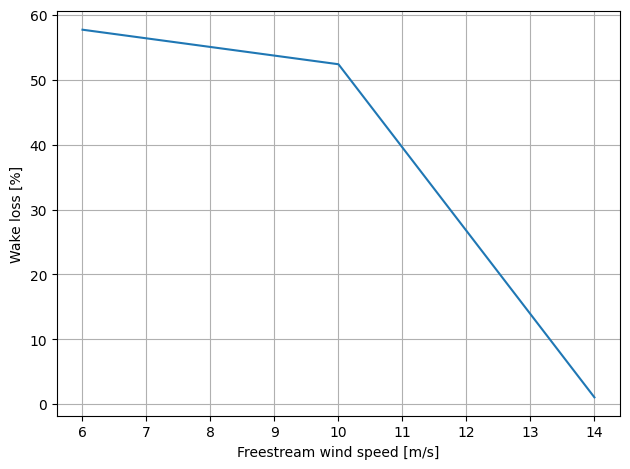

In [11]:
((1-(sim_res.Power.mean('wt') / sim_res.Power.max('wt')))*100).plot()
setup_plot(ylabel='Wake loss [%]', xlabel='Freestream wind speed [m/s]')

## Example 2 - Two turbine types plus wind speed gradient

**First we set up the two types of wind turbines in the farm**

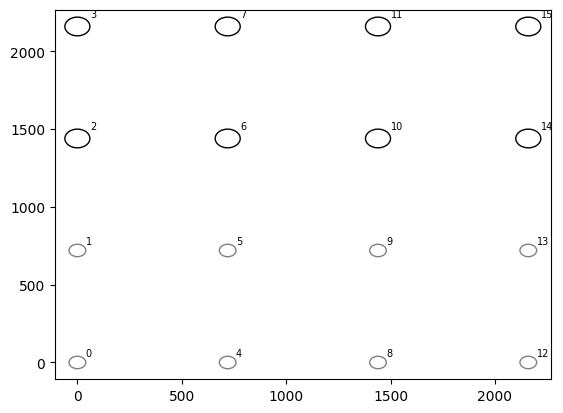

In [12]:
type = np.array([1,1,0,0]*4)
wts.plot(x, y, type=type)

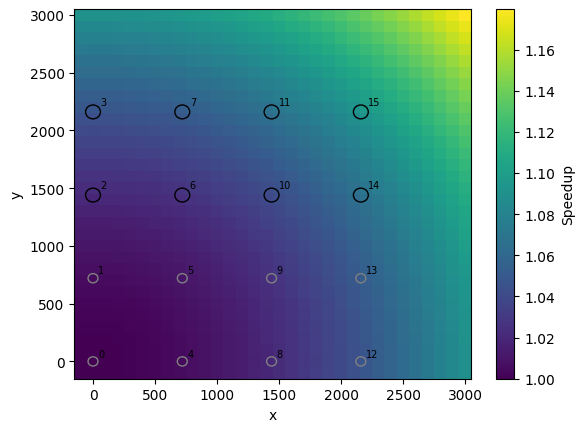

In [13]:
import xarray as xr
from py_wake.site import XRSite

x_pt = np.arange(-100,3100,100)
Y_pt,X_pt = np.meshgrid(x_pt,x_pt)
grad = ((X_pt-5)**2 + (Y_pt)**2)*10**(-8) + 1
speedup= grad/grad[1,1]
ds = xr.Dataset({'Speedup':(('x','y'), speedup), 'P':1}, coords={'x':x_pt,'y':x_pt})
ds.Speedup.plot()
wts.plot(x, y, type=type)

**We now specify the gradients of the wind speed**

In [14]:
gradient_site = XRSite(ds=ds, shear=PowerShear(h_ref=90, alpha=.1))
gradient_site.local_wind(x,y,wts.hub_height(type), ws=1)['WS_ilk']

array([[[0.97518172]],

       [[0.98025267]],

       [[1.03157163]],

       [[1.05776616]],

       [[0.98018245]],

       [[0.9852534 ]],

       [[1.03675394]],

       [[1.06294848]],

       [[0.99528606]],

       [[1.00035701]],

       [[1.05240599]],

       [[1.07860052]],

       [[1.02049256]],

       [[1.0255635 ]],

       [[1.07852775]],

       [[1.10472229]]])

In [15]:
from py_wake.literature import Nygaard_2022

wfm = Nygaard_2022(gradient_site, wts)
sim_res = wfm(x, y, ws=u0, wd=wd, type=type, TI=ti0)
sim_res.WS_eff

<xarray.DataArray 'WS_eff' (wt: 16, wd: 1, ws: 3)>
array([[[ 5.85109034,  9.75181723, 13.65254412]],

       [[ 5.881516  ,  9.80252667, 13.72353733]],

       [[ 6.18942978, 10.31571631, 14.44200283]],

       [[ 6.34659697, 10.57766162, 14.80872627]],

       [[ 4.37635315,  7.29654649, 11.30769686]],

       [[ 4.40032994,  7.33705588, 11.38300503]],

       [[ 4.47086687,  7.59526343, 13.26337806]],

       [[ 4.58382739,  7.82538149, 13.71972616]],

       [[ 4.0259611 ,  6.71637847, 10.09987749]],

       [[ 4.04256332,  6.7422665 , 10.162897  ]],

       [[ 3.98767263,  6.73423506, 12.72628796]],

       [[ 4.08583929,  6.92565811, 13.26102546]],

       [[ 3.94419704,  6.48890696,  9.45282588]],

       [[ 3.95541264,  6.51954795,  9.5148913 ]],

       [[ 3.71960601,  6.2782012 , 12.39637986]],

       [[ 3.80940787,  6.44644865, 13.04456244]]])
Coordinates:
  * wt       (wt) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * wd       (wd) int32 270
  * ws       (ws) int32 6 10 14
    type     (wt) float64 1.0 1.0 0.0 0.0 1.0 1.0 ... 0.0 0.0 1.0 1.0 0.0 0.0
Attributes:
    Description:  Effective local wind speed [m/s]

**Now we can again calculate the power for the new wind farm configuration**

In [16]:
sim_res.Power / 1000

<xarray.DataArray 'Power' (wt: 16, wd: 1, ws: 3)>
array([[[ 267.40809898, 1325.91692326, 2238.80519141]],

       [[ 271.81981999, 1344.52728661, 2243.13577732]],

       [[ 531.93463744, 2253.03477894, 2500.        ]],

       [[ 577.5131225 , 2311.97909224, 2500.        ]],

       [[  87.87178378,  549.9159009 , 1860.30888155]],

       [[  90.02969426,  560.28630549, 1879.96431321]],

       [[ 179.44575863, 1030.67801758, 2500.        ]],

       [[ 195.74176377, 1133.77090798, 2500.        ]],

       [[  56.33649862,  421.5300164 , 1453.25552871]],

       [[  57.8306992 ,  426.31930299, 1476.13161259]],

       [[ 120.79191747,  701.17144884, 2500.        ]],

       [[ 132.47239357,  765.8724426 , 2500.        ]],

       [[  50.98664016,  379.44778803, 1216.18709616]],

       [[  51.59228249,  385.11637136, 1238.96510883]],

       [[  94.52138919,  557.67834759, 2496.89139586]],

       [[ 103.3219714 ,  606.47010743, 2500.        ]]])
Coordinates:
  * wt       (wt) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * wd       (wd) int32 270
  * ws       (ws) int32 6 10 14
    type     (wt) float64 1.0 1.0 0.0 0.0 1.0 1.0 ... 0.0 0.0 1.0 1.0 0.0 0.0

In [17]:
#turbulence intensity
sim_res.TI

<xarray.DataArray 'TI' (ws: 3)>
array([0.09, 0.1 , 0.11])
Coordinates:
  * ws       (ws) int32 6 10 14
Attributes:
    Description:

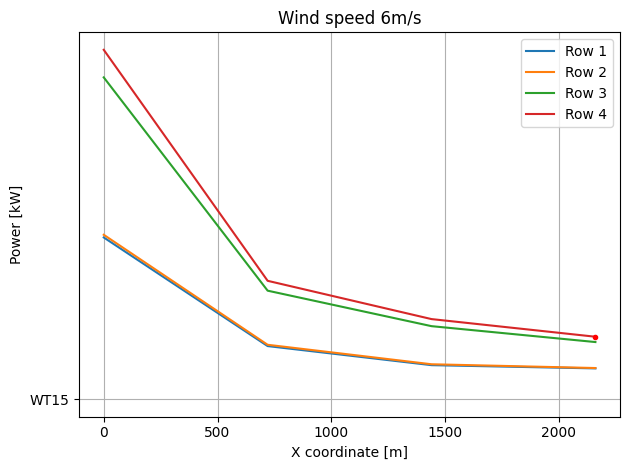

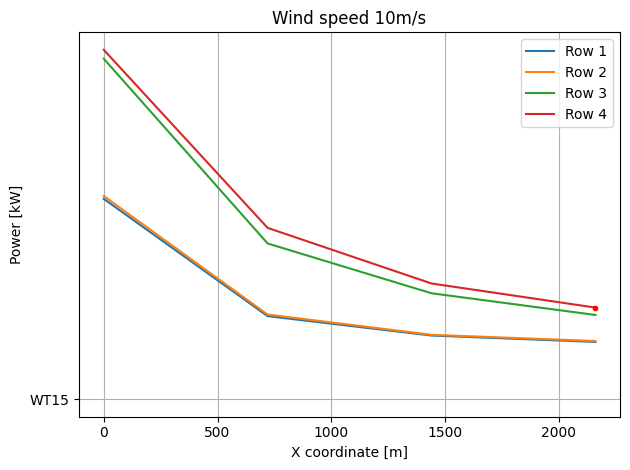

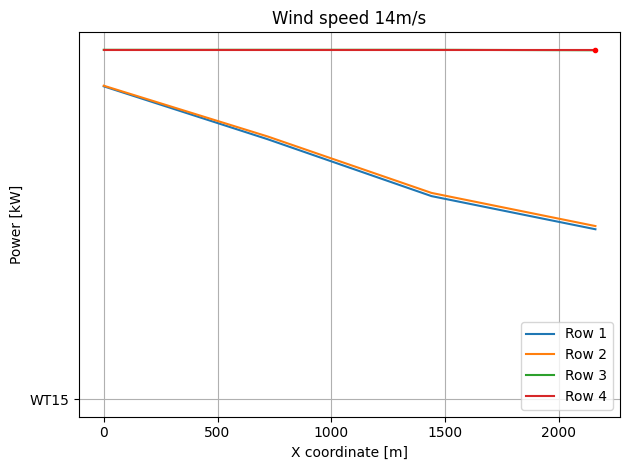

In [18]:
for ws in u0:
    plt.figure()
    for row, p in enumerate((sim_res.Power.sel(ws=ws, wd=270).values.reshape((4,4))).T/1000,1):
        plt.plot(sim_res.x[::4], p, label=f'Row {row}')
    plt.plot(sim_res.x.sel(wt=15), sim_res.Power.sel(ws=ws, wd=270,wt=15)/1000,'.r', 'WT15')
    setup_plot(title=f'Wind speed {ws}m/s', ylabel='Power [kW]', xlabel='X coordinate [m]')